In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

### Preparing the dataset

In [2]:
# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, 
                       columns=iris.feature_names)

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# the two features to be used
col1 = "sepal length (cm)"
col2 = "sepal width (cm)"

In [5]:
# new dataframe with only two features
new_df = iris_df[[col1, col2]]
new_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

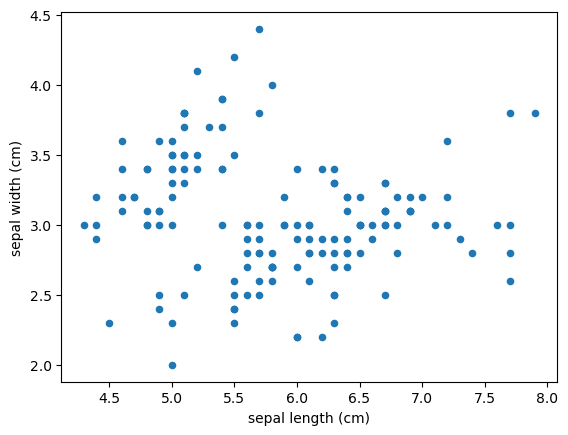

In [6]:
new_df.plot.scatter(col1, col2)

## Hierarchical Clustering

### Dendrogram

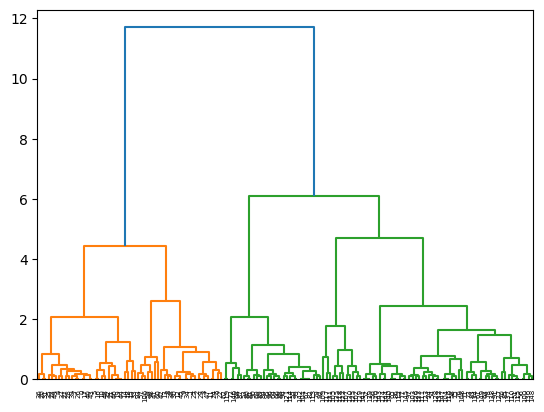

In [7]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

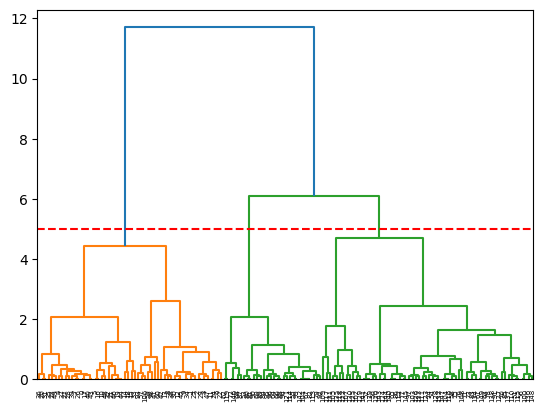

In [8]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

# plot horizontal line at y = 5
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [9]:
agg_model = AgglomerativeClustering(n_clusters=3, 
                                    metric='euclidean', 
                                    linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

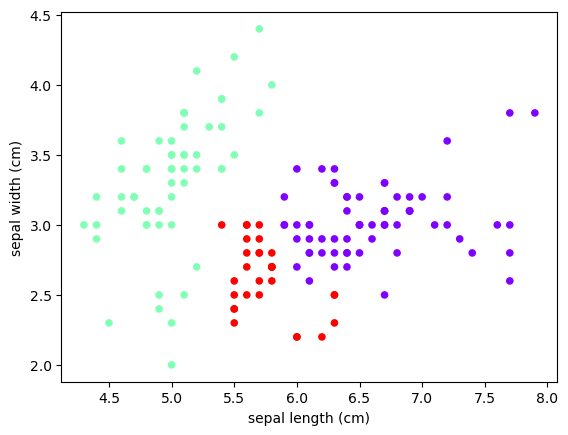

In [10]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

## KMeans
### Silhouette Score

In [11]:
# k_range is from k=2 to k=14
k_range = range(2, 15)

highest_score = -1
k_with_highest_score = -1

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto')
    km_model.fit(new_df)
    km_labels = km_model.predict(new_df)
    avg = silhouette_score(new_df, km_labels)
    
    print((k, round(avg, 4)))
    
    if avg > highest_score:
        highest_score = avg
        k_with_highest_score = k

(2, 0.463)
(3, 0.4424)
(4, 0.3729)
(5, 0.3883)
(6, 0.4069)
(7, 0.3954)
(8, 0.3846)
(9, 0.3697)
(10, 0.3873)
(11, 0.3498)
(12, 0.3884)
(13, 0.3661)
(14, 0.373)


In [12]:
print("K = " + str(k_with_highest_score))
print("Score = " + str(highest_score))

K = 2
Score = 0.4629549773635977


In [13]:
km_model = KMeans(n_clusters=k_with_highest_score, n_init='auto')
km_model.fit(new_df)

KMeans(n_clusters=2, n_init='auto')

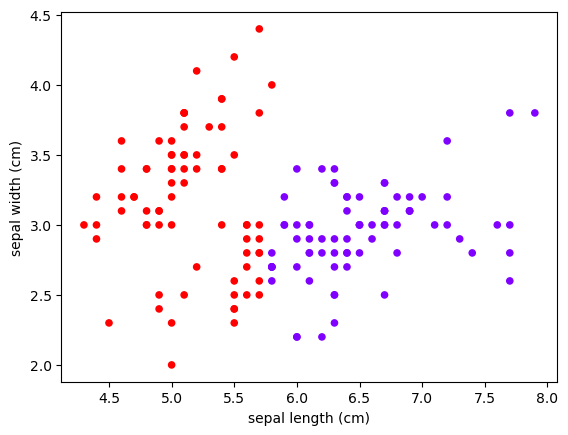

In [14]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### Elbow Method

In [15]:
inertias = []
# k_range is from k=2 to k=14
k_range = range(2, 15)

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto")
    km_model.fit(new_df)
    inertias.append([k, km_model.inertia_])
    
inertias

[[2, 58.204092789066756],
 [3, 37.08627024722935],
 [4, 28.233391466709048],
 [5, 21.002125982249428],
 [6, 19.660792748917746],
 [7, 15.352978909706854],
 [8, 13.349028993793063],
 [9, 12.686161796675195],
 [10, 10.23080170755171],
 [11, 9.945211732711732],
 [12, 8.312216081304319],
 [13, 7.298489641397251],
 [14, 6.958462535014007]]

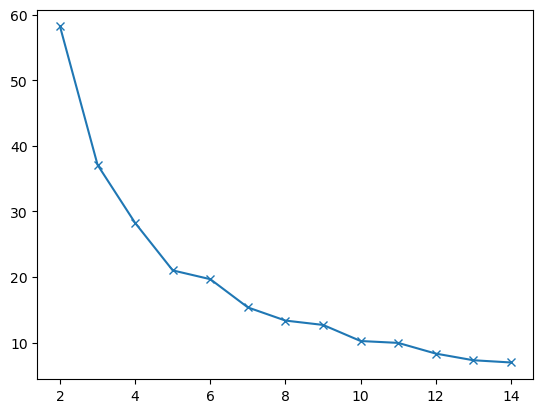

In [16]:
inertias = np.array(inertias)
plt.plot(inertias[:,0], inertias[:,1], 'x-')
plt.show()

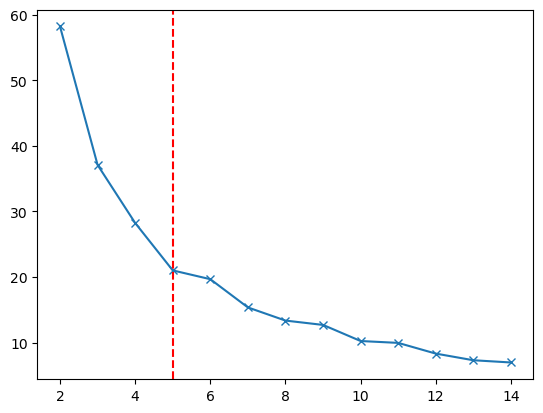

In [17]:
plt.plot(inertias[:,0], inertias[:,1], 'x-')

# plot a vertical line at x = 5
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

In [18]:
km_model = KMeans(n_clusters=4, n_init="auto")
km_model.fit(new_df)

KMeans(n_clusters=4, n_init='auto')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

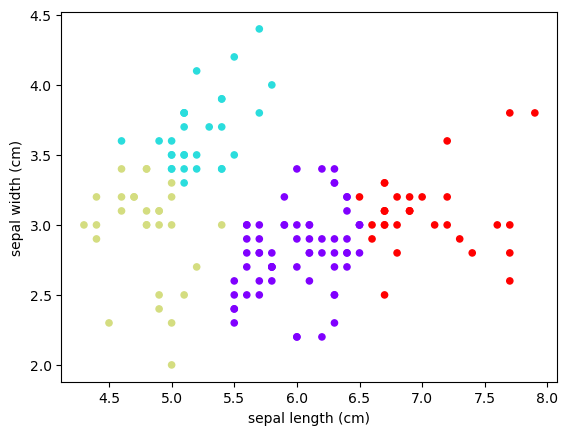

In [19]:
new_df.plot.scatter(col1, col2, c = km_model.labels_, 
                    cmap="rainbow",
                    colorbar=False)